## Question 1:  
Implement Linear Regression for the Abalone Dataset. The
dataset contains 9 variables out of which the last column is
the output variable and the other 8 are input attributes. You
need to implement gradient descent from scratch. Normalize
the data and choose an appropriate learning rate. Divide the
dataset into training and testing (80-20)  

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split

### Importing data from csv

In [113]:
df = pd.read_csv("abalone.csv")
df.sample(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2201,F,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.5100,25
1832,I,0.390,0.310,0.105,0.2665,0.1185,0.0525,0.0810,8
2720,I,0.370,0.275,0.090,0.2065,0.0960,0.0395,0.0580,7
3953,I,0.465,0.355,0.120,0.5805,0.2550,0.0915,0.1840,8
1633,I,0.575,0.425,0.135,0.7965,0.3640,0.1960,0.2390,10
1798,M,0.600,0.495,0.175,1.3005,0.6195,0.2840,0.3285,11
1471,M,0.530,0.400,0.125,0.7575,0.3980,0.1510,0.1750,8
1748,F,0.705,0.545,0.170,1.5800,0.6435,0.4565,0.2650,11
2618,F,0.690,0.545,0.205,1.9330,0.7855,0.4290,0.4980,13
2306,F,0.650,0.500,0.165,1.1445,0.4850,0.2180,0.3650,12


### One-hot encoding of column name 'Sex' 

In [114]:
df1 = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)
df = pd.concat([df1, df.iloc[:, 1:]], axis=1)
df.sample(10)

,Sex_I,Sex_M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2058,0,1,0.485,0.390,0.135,0.6170,0.2500,0.1345,0.1635,8
3692,0,1,0.650,0.520,0.170,1.3655,0.6155,0.2885,0.3600,11
876,0,1,0.635,0.510,0.170,1.3555,0.6190,0.3050,0.3900,9
1765,1,0,0.375,0.245,0.100,0.3940,0.1660,0.0910,0.1125,6
480,0,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.4750,29
2565,1,0,0.450,0.350,0.120,0.4680,0.2005,0.1065,0.1325,8
3436,1,0,0.380,0.275,0.095,0.2505,0.0945,0.0655,0.0750,6
509,1,0,0.560,0.445,0.155,0.8735,0.3005,0.2090,0.2750,16
2688,0,1,0.630,0.465,0.150,1.0270,0.5370,0.1880,0.1760,8
1822,0,1,0.720,0.560,0.180,1.5865,0.6910,0.3750,0.4425,11


### Normalizing the data using MinMaxScaler to get values between 0 and 1

In [52]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

### Splitting data into dependent and independent variable

In [53]:
X = df[:, :-1]
y = df[:, -1]
y

array([0.5       , 0.21428571, 0.28571429, ..., 0.28571429, 0.32142857,
       0.39285714])

### Splitting data into training and testing set

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
def cost_func(theta, X, y):
    m = len(X)
    pred = X.dot(theta)
    cost = (1/m) * np.sum(np.square(pred - y))
    return cost**(1/2)

In [56]:
def gradientDescent(X_train, X_test, y_train, y_test, alpha, epochs):
    X_train = np.c_[np.ones((len(X_train), 1), dtype='int'), X_train]
    X_test = np.c_[np.ones((len(X_test), 1), dtype='int'), X_test]
    m = len(y_train)
    theta = np.zeros(X_train.shape[1]).T
    rmse_train = np.empty(epochs)
    rmse_test = np.empty(epochs)
    it = np.arange(epochs)
    for i in range(epochs):
        pred = np.dot(X_train, theta)
        theta = theta - (1 / m) * alpha * (X_train.T.dot((pred - y_train)))
        rmse_train[i] = cost_func(theta, X_train, y_train)
        rmse_test[i] = cost_func(theta, X_test, y_test)
    plt.plot(it, rmse_train, c='red', label='Training RMSE')
    plt.plot(it, rmse_test, c='green', label='Testing RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    return theta, rmse_train, rmse_test

### (a) Include plots for the root mean squared error (RMSE) vs gradient descent iterations for both training as well as validation set

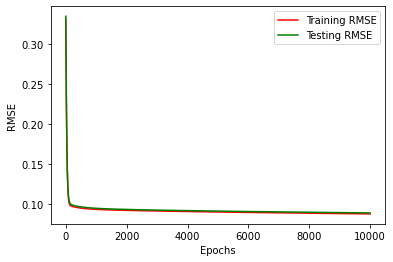

In [57]:
theta, rmse_train, rmse_test = gradientDescent(X_train, X_test, y_train, y_test, 0.01, 10000)
rmse_train_gd = rmse_train[-1]
rmse_test_gd = rmse_test[-1]

### (b) Also implement the normal equation (closed form) for linear regression and get the optimal parameters directly. Compute the RMSE (after getting the optimal parameters) for both training and testing set and report them.

In [58]:
def rmse(y, y_pred):
    res = (1 / len(y)) * np.sum(np.square(y - y_pred))
    return (res ** 0.5)

### Closed Form:

In [59]:
X1 = np.c_[np.ones((len(X), 1), dtype='int'), X]
theta_normal = np.linalg.inv(X1.T @ X1) @ X1.T @ y 

### Appending a column of ones in X

In [60]:
X_train1 = np.c_[np.ones((len(X_train), 1), dtype='int'), X_train]
X_test1 = np.c_[np.ones((len(X_test), 1), dtype='int'), X_test]

### (c)  Compare the final RMSE obtained from (a) after convergence and the RMSE from (b) and make a note of any observations you might have.

In [61]:
rmse_train_closed = cost_func(theta_normal, X_train1, y_train)
rmse_test_closed = cost_func(theta_normal, X_test1, y_test)
print('RMSE for training set using gradient descent: ', rmse_train_gd)
print('RMSE for testing set using gradient descent: ',  rmse_test_gd)
print('RMSE for training set using normal equation: ', rmse_train_closed)
print('RMSE for testing set using normal equation: ',  rmse_test_closed)

RMSE for training set using gradient descent:  0.0880222134475236
RMSE for testing set using gradient descent:  0.08927900360393025
RMSE for training set using normal equation:  0.07753606494777338
RMSE for testing set using normal equation:  0.08112621697338739


### Note- Since predicting the no. of rings is a classification problem and here we are using linear regression so the rmse value is not significantly less than gradient descent even in the case of normal equation i.e. closed form.

## Question 2: 
Use 5-fold cross validation with grid search on the training set (from the above dataset) to find the appropriate regularization parameter (hyperparameter). You may use Ridge, Lasso and GridSearchCV routines from the sklearn library to perform the following:

### Importing data from csv

In [62]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### One-hot encoding of column name 'Sex' 

In [63]:
df1 = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)
df = pd.concat([df1, df.iloc[:, 1:]], axis=1)
df.head()

,Sex_I,Sex_M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Splitting data into dependent and independent variable

In [64]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [65]:
# Create regularization hyperparameter space
C = np.linspace(0.1, 25, 50)
# Create hyperparameter options
hyperparameters = dict(alpha=C)
hyperparameters

{'alpha': array([ 0.1       ,  0.60816327,  1.11632653,  1.6244898 ,  2.13265306,
         2.64081633,  3.14897959,  3.65714286,  4.16530612,  4.67346939,
         5.18163265,  5.68979592,  6.19795918,  6.70612245,  7.21428571,
         7.72244898,  8.23061224,  8.73877551,  9.24693878,  9.75510204,
        10.26326531, 10.77142857, 11.27959184, 11.7877551 , 12.29591837,
        12.80408163, 13.3122449 , 13.82040816, 14.32857143, 14.83673469,
        15.34489796, 15.85306122, 16.36122449, 16.86938776, 17.37755102,
        17.88571429, 18.39387755, 18.90204082, 19.41020408, 19.91836735,
        20.42653061, 20.93469388, 21.44285714, 21.95102041, 22.45918367,
        22.96734694, 23.4755102 , 23.98367347, 24.49183673, 25.        ])}

### (a) Find the optimal regularization parameter for L2

In [66]:
gridSearch = GridSearchCV(Ridge(), hyperparameters, cv=5)
best_model1 = gridSearch.fit(X, y)
print("Best alpha for Ridge Regression i.e L2: ", best_model1.best_params_['alpha'])

Best alpha for Ridge Regression i.e L2:  1.116326530612245


### (b) Find the optimal regularization parameter for L1

In [67]:
gridSearch = GridSearchCV(Lasso(), hyperparameters, cv=5)
best_model2 = gridSearch.fit(X, y)
print("Best alpha for Lasso Regression i.e L1: ", best_model2.best_params_['alpha'])

Best alpha for Lasso Regression i.e L1:  0.1


In [68]:
def cost_func(theta, X, y):
    m = len(X)
    pred = X.dot(theta)
    cost = (1/m) * np.sum(np.square(pred - y))
    return cost**(1/2)

In [69]:
def gradientDescent(X_train, X_test, y_train, y_test, alpha, epochs, lmb):
    m = len(y_train)
    X_train = np.c_[np.ones((len(X_train), 1), dtype='int'), X_train]
    X_test = np.c_[np.ones((len(X_test), 1), dtype='int'), X_test]
    theta = np.zeros(X_train.shape[1]).T
    rmse_train = np.empty(epochs)
    rmse_test = np.empty(epochs)
    it = np.arange(epochs)
    for i in range(epochs):
        pred = np.dot(X_train, theta)
        theta[1:] = theta[1:] - (1 / m) * alpha * ((X_train[:, 1:].T@(pred - y_train)) + ((lmb) * theta[1:]))
        theta[0] = theta[0] - (1 / m) * alpha * ((X_train[:, 0].T@(pred - y_train)))
        rmse_train[i] = cost_func(theta, X_train, y_train)
        rmse_test[i] = cost_func(theta, X_test, y_test)
    plt.plot(it, rmse_train, c='red', label='Training RMSE')
    plt.plot(it, rmse_test, c='green', label='Testing RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    return theta, rmse_train, rmse_test

### Normalizing the data using MinMaxScaler to get values between 0 and 1


In [70]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

### Splitting data into dependent and independent variable


In [71]:
X = df[:, :-1]
y = df[:, -1]

### Splitting data into training and testing set


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

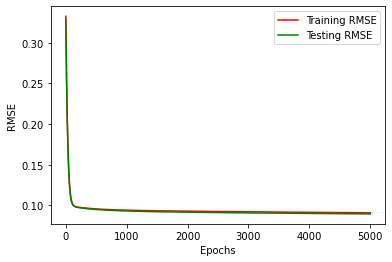

In [73]:
theta, rmse_train, rmse_test = gradientDescent(X_train, X_test, y_train, y_test, 0.01, 5000, best_model1.best_params_['alpha'])
rmse_train_gd = rmse_train[-1]
rmse_test_gd = rmse_test[-1]

In [74]:
print('RMSE for training set using gradient descent: ', rmse_train_gd)
print('RMSE for testing set using gradient descent: ',  rmse_test_gd)

RMSE for training set using gradient descent:  0.09092756159796965
RMSE for testing set using gradient descent:  0.08953588694631705


### L1 regularization:

In [75]:
def gradientDescent(X_train, X_test, y_train, y_test, alpha, epochs, lmb):
    m = len(y_train)
    X_train = np.c_[np.ones((len(X_train), 1), dtype='int'), X_train]
    X_test = np.c_[np.ones((len(X_test), 1), dtype='int'), X_test]
    theta = np.zeros(X_train.shape[1]).T
    rmse_train = np.empty(epochs)
    rmse_test = np.empty(epochs)
    it = np.arange(epochs)
    for i in range(epochs):
        pred = np.dot(X_train, theta)
        theta[1:] = theta[1:] - (1 / m) * alpha * ((X_train[:, 1:].T@(pred - y_train)) + ((lmb) * np.sign(theta[1:])))
        theta[0] = theta[0] - (1 / m) * alpha * ((X_train[:, 0].T@(pred - y_train)))
        rmse_train[i] = cost_func(theta, X_train, y_train)
        rmse_test[i] = cost_func(theta, X_test, y_test)
    plt.plot(it, rmse_train, c='red', label='Training RMSE')
    plt.plot(it, rmse_test, c='green', label='Testing RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    return theta, rmse_train, rmse_test

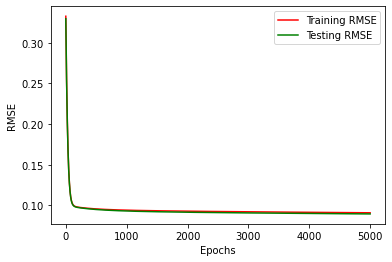

In [76]:
theta, rmse_train, rmse_test = gradientDescent(X_train, X_test, y_train, y_test, 0.01, 5000, best_model2.best_params_['alpha'])
rmse_train_gd1 = rmse_train[-1]
rmse_test_gd1 = rmse_test[-1]

In [77]:
print('RMSE for training set using gradient descent: ', rmse_train_gd1)
print('RMSE for testing set using gradient descent: ',  rmse_test_gd1)

RMSE for training set using gradient descent:  0.0909301118169877
RMSE for testing set using gradient descent:  0.08954066611462273


## Question 3:
Use the data in file head_brain.csv that contains only 1 input
variable and 1 output variable i.e. the brain-weight to the
body-weight proportion for varying species. Consider the
dataset as a whole i.e. do not split it into train, val or test.
Perform the following tasks:

### Importing data from csv

In [95]:
df = pd.read_csv('head_brain.csv')
df.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


### Normalizing the data using MinMaxScaler to get values between 0 and 1


In [96]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

### Splitting data into dependent and independent variable


In [97]:
X = df[:, :-1]
y = df[:, -1]

### (a) Plot the data points using a scatter plot along with the best fit line found out using linear regression (without regularization).

In [98]:
def cost_func(theta, X, y):
    m = len(X)
    pred = X.dot(theta)
    cost = (1/m) * np.sum(np.square(pred - y))
    return cost**(1/2)

In [99]:
def gradientDescent(X, y, alpha, epochs):
    X = np.c_[np.ones((len(X), 1), dtype='int'), X]
    m = len(y)
    theta = np.zeros(X.shape[1]).T
    for i in range(epochs):
        pred = np.dot(X, theta)
        theta = theta - (1 / m) * alpha * (X.T.dot((pred - y)))
    return theta

In [100]:
theta = gradientDescent(X, y, 0.01, 20000)

In [101]:
X_max = np.max(X) + 100
X_min = np.min(X) - 100
X1 = np.linspace(X_min,X_max,1000)

y1 = theta[0] + theta[1] * X1

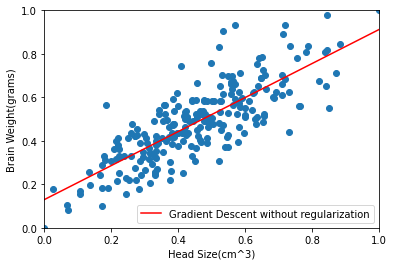

In [102]:
plt.scatter(X, y)
plt.plot(X1, y1, label='Gradient Descent without regularization', c='red')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

### (b) Use L1 regularization and plot the data points and the new best fit line.

In [103]:
def gradientDescentL1(X, y, alpha, epochs, lmb):
    m = len(y)
    X = np.c_[np.ones((len(X), 1), dtype='int'), X]
    theta = np.zeros(X.shape[1]).T
    for i in range(epochs):
        pred = np.dot(X, theta)
        theta[1:] = theta[1:] - (1 / m) * alpha * ((X[:, 1:].T@(pred - y)) + ((lmb) * np.sign(theta[1:])))
        theta[0] = theta[0] - (1 / m) * alpha * ((X[:, 0].T@(pred - y)))
    return theta

In [104]:
thetaL1 = gradientDescentL1(X, y, 0.01, 20000, 0.5)

In [105]:
XL1 = np.linspace(X_min, X_max, 1000)
yL1 = thetaL1[0] + thetaL1[1] * XL1

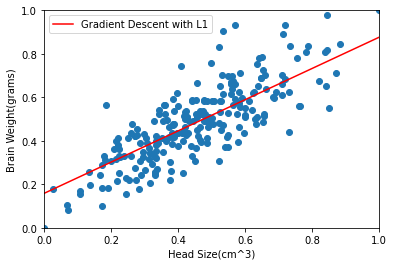

In [106]:
plt.scatter(X, y)
plt.plot(XL1, yL1, label='Gradient Descent with L1', c='red')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

### (c) Use L2 regularization and plot the data points and the new best fit line.

In [107]:
def gradientDescentL2(X, y, alpha, epochs, lmb):
    m = len(y)
    X = np.c_[np.ones((len(X), 1), dtype='int'), X]
    theta = np.zeros(X.shape[1]).T
    for i in range(epochs):
        pred = np.dot(X, theta)
        theta[1:] = theta[1:] - (1 / m) * alpha * ((X[:, 1:].T@(pred - y)) + ((lmb) * theta[1:]))
        theta[0] = theta[0] - (1 / m) * alpha * ((X[:, 0].T@(pred - y)))

    return theta

In [108]:
thetaL2 = gradientDescentL2(X, y, 0.01, 20000, 0.5)

In [109]:
XL2 = np.linspace(X_min, X_max, 1000)
yL2 = thetaL2[0] + thetaL2[1] * XL2

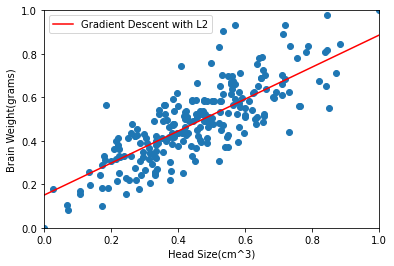

In [110]:
plt.scatter(X, y)
plt.plot(XL2, yL2, label='Gradient Descent with L2', c='red')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

### Compare how the best fit line changes visually with adding different kinds of regularization, was it a better fit, worse fit than the regression performed without regularization?

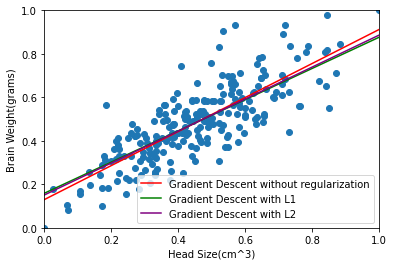

In [111]:
plt.scatter(X, y)
plt.plot(X1, y1, label='Gradient Descent without regularization', c='red')
plt.plot(XL1, yL1, label='Gradient Descent with L1', c='green')
plt.plot(XL2, yL2, label='Gradient Descent with L2', c='purple')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.show()

## Observations: 
- The best fit line is the one without any regularization.
- On adding L1 and L2 regularization there is a slight change in the fit because of  the penalty that has been added in order to avoid overfitting.